In [260]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


In [261]:
ore  = pd.read_csv("data/ORE.csv")
sheep  = pd.read_csv("data/SHEEP.csv")
vp = pd.read_csv("data/VP.csv")
wheat  = pd.read_csv("data/WHEAT.csv")

In [262]:
ore["mid"] = 0.5 * (ore["Bids"] + ore["Asks"])
sheep["mid"] = 0.5 * (sheep["Bids"] + sheep["Asks"])
vp["mid"] = 0.5 * (vp["Bids"] + vp["Asks"])
wheat["mid"] = 0.5 * (wheat["Bids"] + wheat["Asks"])

In [263]:
import plotly.graph_objects as go
import numpy as np

# Create the figure
fig = go.Figure()

# Add all four commodities using proper arrays for x-axis
fig.add_trace(go.Scatter(
    x=np.arange(len(ore['mid'])),
    y=ore['mid'], 
    name='ORE', 
    line=dict(width=2, color='royalblue'),
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(sheet['mid'])),
    y=sheet['mid'], 
    name='SHEET', 
    line=dict(width=2, color='crimson'),
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(vp['mid'])),
    y=vp['mid'], 
    name='VP', 
    line=dict(width=2, color='forestgreen'),
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(wheat['mid'])),
    y=wheat['mid'], 
    name='WHEAT', 
    line=dict(width=2, color='darkorchid'),
    mode='lines'
))

# Update layout
fig.update_layout(
    title='Commodity Mid Prices',
    xaxis_title='Ticks',
    yaxis_title='Price',
    
    # Configure legend as checkboxes
    legend=dict(
        itemclick="toggle",
        itemdoubleclick="toggleothers",
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    
    # Configure x-axis as numeric
    xaxis=dict(
        type="linear",
        rangeslider=dict(visible=True, thickness=0.05),
        gridcolor='lightgray',
        showgrid=True
    ),
    
    # Regular y-axis
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        zeroline=False
    ),
    
    # Improve overall appearance
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50),
    height=600,
    width=1000,
    hovermode="x unified"  # Show all values at the same x position
)

# Hover information
fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b>: %{y:.2f}<extra></extra>'
)

# Show the figure
fig.show()

Looks like most of the money will be made in VP as it has the most volatility and the other ones likely can't make enough to cover the spread ( will check now )

Sheep -> 3 exactly
Ore -> 0.2 exactly
Wheat -> 0.6 exactly

In [264]:
sheep["spread"] = sheep["Asks"] - sheep["Bids"]
ore["spread"] = ore["Asks"] - ore["Bids"]
wheat["spread"] = wheat["Asks"] - wheat["Bids"]
vp["spread"] = vp["Asks"] - vp["Bids"]

# calculating mean price / mean spread
print(f"sheep: {sheep['mid'].mean() / sheep['spread'].mean()}")
print(f"ore: {ore['mid'].mean() / ore['spread'].mean()}")
print(f"wheat: {wheat['mid'].mean() / wheat['spread'].mean()}")
print(f"vp: {vp['mid'].mean() / vp['spread'].mean()}")


sheep: 127.98394369738413
ore: 213.8086721297182
wheat: 219.18887931107662
vp: 268.4289787855061


higher is better because means spread less % of price on avg. Likely means that you can probably make money on everything except for sheep then??

In [265]:
import plotly.graph_objects as go
import numpy as np

# Create the figure
fig = go.Figure()

# Normalize function to scale between 0-1
def normalize(series):
    min_val = series.min()
    max_val = series.max()
    return (series - min_val) / (max_val - min_val)

# Normalize each dataset
ore_norm = normalize(ore['mid'])
sheet_norm = normalize(sheet['mid'])
vp_norm = normalize(vp['mid'])
wheat_norm = normalize(wheat['mid'])

# Add each commodity with normalized values
fig.add_trace(go.Scatter(
    x=np.arange(len(ore_norm)),
    y=ore_norm, 
    name='ORE', 
    line=dict(width=2, color='royalblue'),
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(sheet_norm)),
    y=sheet_norm, 
    name='SHEET', 
    line=dict(width=2, color='crimson'),
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(vp_norm)),
    y=vp_norm, 
    name='VP', 
    line=dict(width=2, color='forestgreen'),
    mode='lines'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(wheat_norm)),
    y=wheat_norm, 
    name='WHEAT', 
    line=dict(width=2, color='darkorchid'),
    mode='lines'
))

# Update layout
fig.update_layout(
    title='Normalized Commodity Prices (0-1 Scale)',
    xaxis_title='Ticks',
    yaxis_title='Normalized Price',
    
    # Configure legend as checkboxes
    legend=dict(
        itemclick="toggle",
        itemdoubleclick="toggleothers",
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    
    # Configure x-axis
    xaxis=dict(
        type="linear",
        rangeslider=dict(visible=True, thickness=0.05),
        gridcolor='lightgray',
        showgrid=True
    ),
    
    # Configure y-axis with fixed range
    yaxis=dict(
        range=[0, 1],  # Fix y-axis range from 0 to 1
        gridcolor='lightgray',
        showgrid=True,
        zeroline=False
    ),
    
    # Improve overall appearance
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50),
    height=600,
    width=1000,
    hovermode="x unified"
)

# Hover information showing both normalized and original values
fig.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>Normalized: %{y:.3f}<extra></extra>'
)

# Show the figure
fig.show()

Observations:

- VP definitely leading ore. by how much? around 33 will need to check
- Pretty closely correlated. However ticks to 1000-3000 they deviated a lot for some reason before meeting again? very strange

             Pair  Max Correlation  Optimal Shift                     Lead/Lag
0    ORE vs SHEEP         0.185201          -1000    ORE leads by 1000 periods
1       ORE vs VP         0.845854              0                  No lead/lag
2    ORE vs WHEAT         0.109674              0                  No lead/lag
3     SHEEP vs VP         0.438737          -1000  SHEEP leads by 1000 periods
4  SHEEP vs WHEAT         0.343868           -999   SHEEP leads by 999 periods
5     VP vs WHEAT         0.592964              0                  No lead/lag


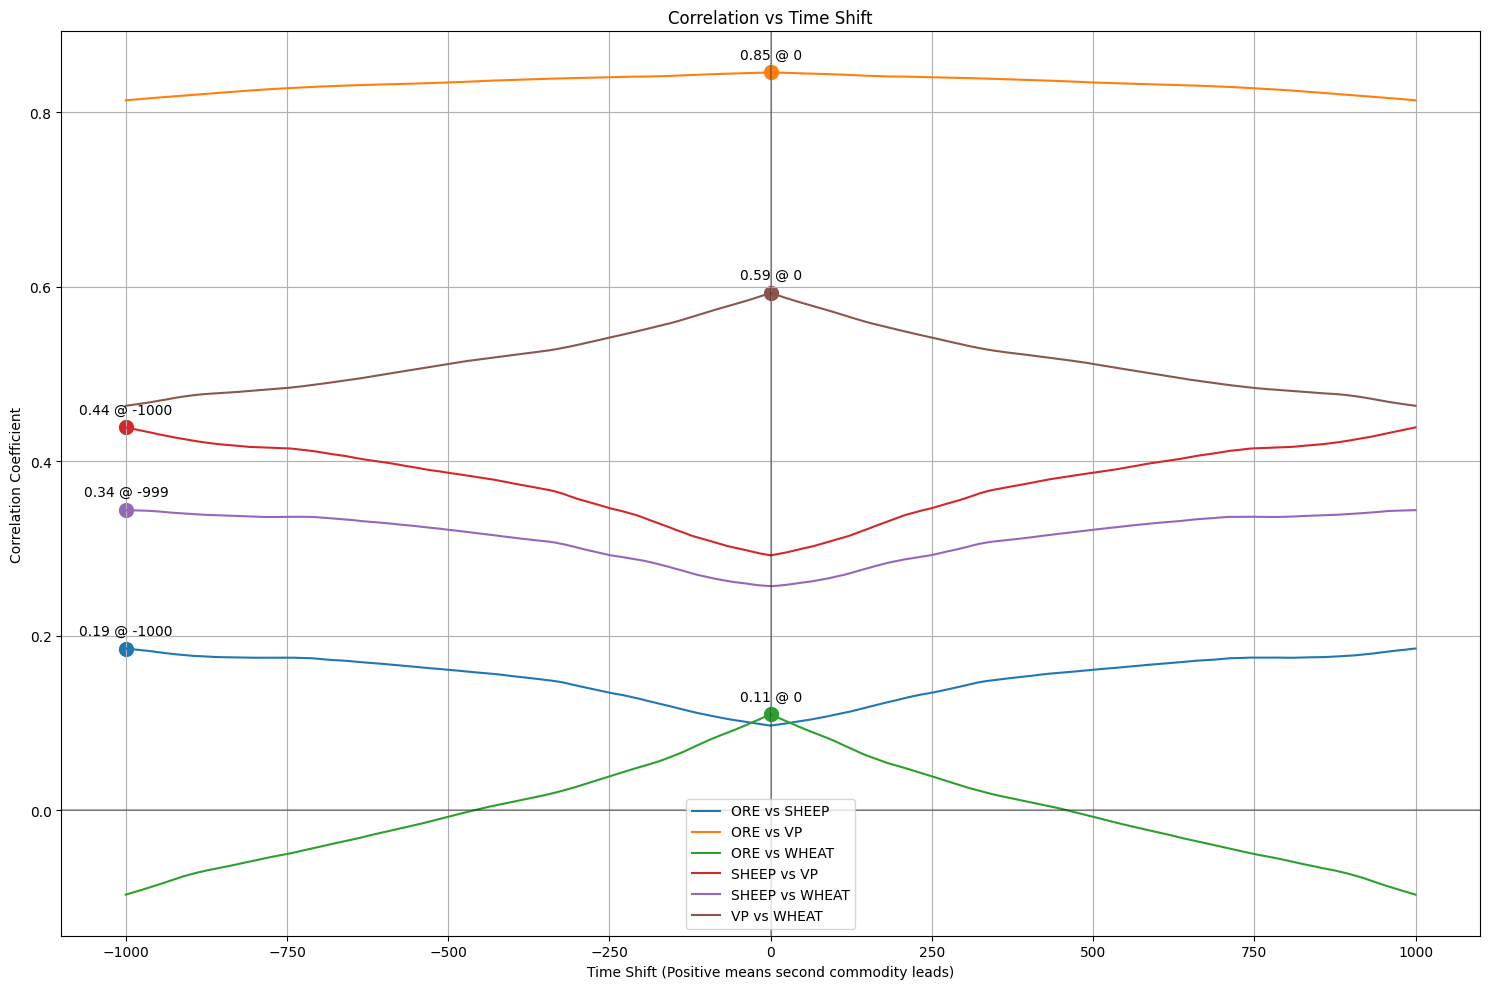

In [266]:
# Function to find maximum correlation with time shifts
def find_max_correlation_with_shifts(df, shifts_range=(-100, 100)):
    """
    Find the maximum correlation between pairs of commodities with time shifts
    
    Parameters:
    df - DataFrame with commodity prices
    shifts_range - Tuple with (min_shift, max_shift) to test
    """
    commodities = df.columns
    results = {}
    
    # For each pair of commodities
    for i, comm1 in enumerate(commodities):
        for j, comm2 in enumerate(commodities):
            if i < j:  # Only process each pair once
                pair_name = f"{comm1}_{comm2}"
                results[pair_name] = {
                    'max_corr': 0,
                    'optimal_shift': 0
                }
                
                # Test correlations at different shifts
                corrs = []
                shifts = range(shifts_range[0], shifts_range[1] + 1)
                
                for shift in shifts:
                    # Shift the second commodity
                    if shift < 0:
                        # Negative shift: comm1 leads comm2
                        df1 = df[comm1].iloc[-shift:]
                        df2 = df[comm2].iloc[:shift]
                    else:
                        # Positive shift: comm2 leads comm1
                        df1 = df[comm1].iloc[:-shift] if shift > 0 else df[comm1]
                        df2 = df[comm2].iloc[shift:] if shift > 0 else df[comm2]
                    
                    # Align the indices
                    aligned_data = pd.concat([df1, df2], axis=1).dropna()
                    
                    # Calculate correlation if we have enough data
                    if len(aligned_data) > 30:  # Require at least 30 points
                        corr = aligned_data[comm1].corr(aligned_data[comm2])
                        corrs.append((shift, corr))
                        
                        # Update max if this is better
                        if abs(corr) > abs(results[pair_name]['max_corr']):
                            results[pair_name]['max_corr'] = corr
                            results[pair_name]['optimal_shift'] = shift
                
                # Store all correlations for plotting
                results[pair_name]['all_corrs'] = corrs
    
    return results

# Run the analysis
shift_results = find_max_correlation_with_shifts(combined_df, shifts_range=(-1000, 1000))

# Create a summary DataFrame
summary = []
for pair, data in shift_results.items():
    comm1, comm2 = pair.split('_')
    summary.append({
        'Pair': f"{comm1} vs {comm2}",
        'Max Correlation': data['max_corr'],
        'Optimal Shift': data['optimal_shift'],
        'Lead/Lag': f"{comm1} leads by {-data['optimal_shift']} periods" if data['optimal_shift'] < 0 else 
                    f"{comm2} leads by {data['optimal_shift']} periods" if data['optimal_shift'] > 0 else
                    "No lead/lag"
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

# Plot correlation vs shifts for each pair
plt.figure(figsize=(15, 10))
for pair, data in shift_results.items():
    comm1, comm2 = pair.split('_')
    shifts, corrs = zip(*data['all_corrs'])
    plt.plot(shifts, corrs, label=f"{comm1} vs {comm2}")
    
    # Mark the max correlation point
    opt_shift = data['optimal_shift']
    max_corr = data['max_corr']
    plt.scatter(opt_shift, max_corr, s=100, marker='o')
    plt.annotate(f"{round(max_corr, 2)} @ {opt_shift}", 
                 (opt_shift, max_corr), 
                 textcoords="offset points",
                 xytext=(0, 10), 
                 ha='center')

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True)
plt.legend()
plt.title('Correlation vs Time Shift')
plt.xlabel('Time Shift (Positive means second commodity leads)')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

ore vs vp are meaningfulyl correlated
vp vs wheat are meaningfully correlated
ore vs wheat is somehwat but not that much


everything else it not meaningful




In [268]:
# Time Series Correlation Analysis
def time_series_correlation_analysis(ore, vp, wheat, window=30, lag=0):
    """
    Analyze if wheat price movements correlate with the correlation between ore and VP.
    
    Parameters:
    -----------
    ore : pandas.DataFrame
        DataFrame containing ore price data with 'mid' column
    vp : pandas.DataFrame
        DataFrame containing VP price data with 'mid' column
    wheat : pandas.DataFrame
        DataFrame containing wheat price data with 'mid' column
    window : int, default=30
        Rolling window size for correlation calculation
    lag : int, default=0
        Lag to apply to wheat prices (positive means wheat leads)
    
    Returns:
    --------
    dict
        Dictionary containing correlation results and analysis
    """
    import pandas as pd
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    
    # Make sure all dataframes have the same index
    data = pd.DataFrame({
        'ore': ore['mid'],
        'vp': vp['mid'],
        'wheat': wheat['mid']
    })
    
    # Calculate rolling returns (percent changes)
    returns = data.pct_change().dropna()
    
    # Calculate rolling correlation between ore and VP
    rolling_corr = returns['ore'].rolling(window=window).corr(returns['vp'])
    
    # Calculate wheat returns
    wheat_returns = returns['wheat']
    
    # Apply lag if specified
    if lag != 0:
        wheat_returns = wheat_returns.shift(-lag)  # Negative shift because we want wheat to lead
    
    # Align the data after applying lag
    aligned_data = pd.DataFrame({
        'ore_vp_corr': rolling_corr,
        'wheat_returns': wheat_returns
    }).dropna()
    
    # Calculate correlation between wheat returns and ore-VP correlation
    correlation, p_value = stats.pearsonr(
        aligned_data['wheat_returns'],
        aligned_data['ore_vp_corr']
    )
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Rolling correlation between ore and VP
    ax1 = plt.subplot(3, 1, 1)
    aligned_data['ore_vp_corr'].plot(ax=ax1)
    ax1.set_title('Rolling Correlation between Ore and VP')
    ax1.set_ylabel('Correlation')
    
    # Plot 2: Wheat returns
    ax2 = plt.subplot(3, 1, 2)
    aligned_data['wheat_returns'].plot(ax=ax2)
    ax2.set_title('Wheat Returns')
    ax2.set_ylabel('Returns')
    
    # Plot 3: Scatter plot of wheat returns vs ore-VP correlation
    ax3 = plt.subplot(3, 1, 3)
    ax3.scatter(aligned_data['wheat_returns'], aligned_data['ore_vp_corr'], alpha=0.5)
    ax3.set_title(f'Wheat Returns vs Ore-VP Correlation (Pearson r: {correlation:.3f}, p-value: {p_value:.3f})')
    ax3.set_xlabel('Wheat Returns')
    ax3.set_ylabel('Ore-VP Correlation')
    
    # Add regression line
    m, b = np.polyfit(aligned_data['wheat_returns'], aligned_data['ore_vp_corr'], 1)
    ax3.plot(aligned_data['wheat_returns'], m*aligned_data['wheat_returns'] + b, color='red')
    
    plt.tight_layout()
    plt.show()
    
    # Test for multiple lags to find optimal lag
    lag_results = []
    max_lag = min(window, 20)  # Don't test more lags than the window size or 20
    
    for test_lag in range(-max_lag, max_lag+1):
        lagged_wheat = returns['wheat'].shift(-test_lag)
        temp_data = pd.DataFrame({
            'ore_vp_corr': rolling_corr,
            'wheat_returns': lagged_wheat
        }).dropna()
        
        lag_corr, lag_p = stats.pearsonr(
            temp_data['wheat_returns'],
            temp_data['ore_vp_corr']
        )
        
        lag_results.append({
            'lag': test_lag,
            'correlation': lag_corr,
            'p_value': lag_p
        })
    
    lag_df = pd.DataFrame(lag_results)
    best_lag = lag_df.loc[lag_df['correlation'].abs().idxmax()]
    
    # Plot the lag analysis
    plt.figure(figsize=(10, 6))
    plt.bar(lag_df['lag'], lag_df['correlation'])
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.xlabel('Lag (Negative: Wheat lags, Positive: Wheat leads)')
    plt.ylabel('Correlation Coefficient')
    plt.title('Correlation between Wheat Returns and Ore-VP Correlation at Different Lags')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return {
        'correlation': correlation,
        'p_value': p_value,
        'lag_analysis': lag_df,
        'best_lag': best_lag,
        'rolling_data': aligned_data
    }

# Conditional Correlation Analysis
def conditional_correlation_analysis(ore, vp, wheat, n_quantiles=3):
    """
    Analyze if the correlation between ore and VP differs in different wheat price regimes.
    
    Parameters:
    -----------
    ore : pandas.DataFrame
        DataFrame containing ore price data with 'mid' column
    vp : pandas.DataFrame
        DataFrame containing VP price data with 'mid' column
    wheat : pandas.DataFrame
        DataFrame containing wheat price data with 'mid' column
    n_quantiles : int, default=3
        Number of quantiles to divide wheat returns into
    
    Returns:
    --------
    dict
        Dictionary containing conditional correlation results and analysis
    """
    import pandas as pd
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Make sure all dataframes have the same index
    data = pd.DataFrame({
        'ore': ore['mid'],
        'vp': vp['mid'],
        'wheat': wheat['mid']
    })
    
    # Calculate returns
    returns = data.pct_change().dropna()
    
    # Classify wheat returns into regimes (e.g., low, medium, high)
    if n_quantiles == 3:
        labels = ['Falling', 'Stable', 'Rising']
    else:
        labels = [f'Quantile {i+1}' for i in range(n_quantiles)]
    
    # Create wheat return regimes
    returns['wheat_regime'] = pd.qcut(returns['wheat'], q=n_quantiles, labels=labels)
    
    # Calculate correlations within each regime
    regime_correlations = {}
    all_data = []
    
    for regime in labels:
        regime_data = returns[returns['wheat_regime'] == regime]
        
        if len(regime_data) > 2:  # Need at least 3 points to calculate correlation
            corr, p_value = stats.pearsonr(regime_data['ore'], regime_data['vp'])
            
            regime_correlations[regime] = {
                'correlation': corr,
                'p_value': p_value,
                'n_observations': len(regime_data)
            }
            
            # Prepare data for boxplot
            regime_ore = regime_data['ore'].values
            regime_vp = regime_data['vp'].values
            
            for i in range(len(regime_ore)):
                all_data.append({
                    'Wheat Regime': regime,
                    'Ore Return': regime_ore[i],
                    'VP Return': regime_vp[i]
                })
    
    # Create a DataFrame for the correlations
    corr_df = pd.DataFrame.from_dict(regime_correlations, orient='index')
    
    # Visualize correlations by regime
    plt.figure(figsize=(12, 10))
    
    # Plot 1: Bar chart of correlations by regime
    ax1 = plt.subplot(2, 1, 1)
    corr_df['correlation'].plot(kind='bar', ax=ax1, color='skyblue', yerr=corr_df['p_value'])
    ax1.set_title('Correlation between Ore and VP Returns by Wheat Price Regime')
    ax1.set_ylabel('Correlation Coefficient')
    ax1.set_xlabel('Wheat Price Regime')
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    
    for i, v in enumerate(corr_df['correlation']):
        ax1.text(i, v + 0.02, f'{v:.3f}', ha='center')
    
    # Plot 2: Scatter plots by regime
    ax2 = plt.subplot(2, 1, 2)
    
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    markers = ['o', 's', '^', 'D', 'x']
    
    for i, regime in enumerate(labels):
        regime_data = returns[returns['wheat_regime'] == regime]
        if len(regime_data) > 0:
            ax2.scatter(
                regime_data['ore'], 
                regime_data['vp'],
                alpha=0.6,
                label=f"{regime} (r={regime_correlations.get(regime, {}).get('correlation', 0):.3f})",
                color=colors[i % len(colors)],
                marker=markers[i % len(markers)]
            )
    
    ax2.set_xlabel('Ore Returns')
    ax2.set_ylabel('VP Returns')
    ax2.set_title('Ore vs VP Returns by Wheat Price Regime')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Perform statistical test to see if correlations are significantly different
    # We'll use Fisher's Z transformation
    z_scores = {}
    p_values = {}
    
    regimes = list(regime_correlations.keys())
    
    for i in range(len(regimes)):
        for j in range(i+1, len(regimes)):
            regime1 = regimes[i]
            regime2 = regimes[j]
            
            r1 = regime_correlations[regime1]['correlation']
            r2 = regime_correlations[regime2]['correlation']
            n1 = regime_correlations[regime1]['n_observations']
            n2 = regime_correlations[regime2]['n_observations']
            
            # Fisher's Z transformation
            z1 = 0.5 * np.log((1 + r1) / (1 - r1))
            z2 = 0.5 * np.log((1 + r2) / (1 - r2))
            
            # Standard error
            se = np.sqrt(1/(n1-3) + 1/(n2-3))
            
            # Z-score
            z = (z1 - z2) / se
            
            # Two-tailed p-value
            p = 2 * (1 - stats.norm.cdf(abs(z)))
            
            key = f'{regime1} vs {regime2}'
            z_scores[key] = z
            p_values[key] = p
    
    fisher_results = pd.DataFrame({
        'z_score': z_scores,
        'p_value': p_values
    })
    
    return {
        'regime_correlations': corr_df,
        'fisher_test': fisher_results,
        'all_data': pd.DataFrame(all_data)
    }

# Vector Autoregression (VAR) Analysis
def var_analysis(ore, vp, wheat, max_lags=10):
    """
    Perform Vector Autoregression (VAR) analysis to study the dynamic relationship
    between wheat price movements and the correlation between ore and VP.
    
    Parameters:
    -----------
    ore : pandas.DataFrame
        DataFrame containing ore price data with 'mid' column
    vp : pandas.DataFrame
        DataFrame containing VP price data with 'mid' column
    wheat : pandas.DataFrame
        DataFrame containing wheat price data with 'mid' column
    max_lags : int, default=10
        Maximum number of lags to consider in the VAR model
    
    Returns:
    --------
    dict
        Dictionary containing VAR analysis results
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from statsmodels.tsa.api import VAR
    from statsmodels.tsa.stattools import adfuller
    from statsmodels.stats.stattools import durbin_watson
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    # Make sure all dataframes have the same index
    data = pd.DataFrame({
        'ore': ore['mid'],
        'vp': vp['mid'],
        'wheat': wheat['mid']
    })
    
    # Calculate returns
    returns = data.pct_change().dropna()
    
    # Calculate rolling correlation between ore and VP (window of 20 periods)
    rolling_window = min(20, len(returns) // 5)  # Ensure window is not too large
    returns['ore_vp_corr'] = returns['ore'].rolling(window=rolling_window).corr(returns['vp'])
    
    # Drop missing values from the correlation calculation
    var_data = returns[['ore_vp_corr', 'wheat']].dropna()
    
    # Check for stationarity
    adf_results = {}
    for column in var_data.columns:
        adf_result = adfuller(var_data[column].dropna())
        adf_results[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Critical Values': adf_result[4]
        }
    
    # If series are not stationary, take first differences
    if (adf_results['ore_vp_corr']['p-value'] > 0.05) or (adf_results['wheat']['p-value'] > 0.05):
        var_data = var_data.diff().dropna()
        print("Taking first differences to achieve stationarity")
        
        # Verify stationarity after differencing
        for column in var_data.columns:
            adf_result = adfuller(var_data[column].dropna())
            adf_results[f"{column}_diff"] = {
                'ADF Statistic': adf_result[0],
                'p-value': adf_result[1],
                'Critical Values': adf_result[4]
            }
    
    # Create and fit the VAR model
    model = VAR(var_data)
    
    # Select lag order based on information criteria
    lag_order_results = model.select_order(maxlags=max_lags)
    selected_lag = lag_order_results.selected_orders['aic']
    
    # Fit the model with the selected lag order
    var_fit = model.fit(selected_lag)
    
    # Granger causality tests
    granger_wheat_to_corr = var_fit.test_causality(caused='ore_vp_corr', causing='wheat')
    granger_corr_to_wheat = var_fit.test_causality(caused='wheat', causing='ore_vp_corr')
    
    # Impulse Response Analysis
    irf = var_fit.irf(10)  # 10 periods ahead
    
    # Forecast Error Variance Decomposition
    fevd = var_fit.fevd(10)
    
    # Visualizations
    plt.figure(figsize=(12, 10))
    
    # Plot 1: Original time series
    ax1 = plt.subplot(2, 2, 1)
    var_data.plot(ax=ax1)
    ax1.set_title('Time Series of Wheat Returns and Ore-VP Correlation')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Value')
    ax1.legend()
    
    # Plot 2: Impulse responses
    ax2 = plt.subplot(2, 2, 2)
    irf.plot(impulse='wheat', response='ore_vp_corr', ax=ax2)
    ax2.set_title('Response of Ore-VP Correlation to Wheat Shock')
    
    # Plot 3: Forecast Error Variance Decomposition
    ax3 = plt.subplot(2, 2, 3)
    fevd.plot(ax=ax3)
    ax3.set_title('Forecast Error Variance Decomposition')
    
    # Plot 4: Model diagnostics - residual autocorrelation
    ax4 = plt.subplot(2, 2, 4)
    # Get residuals
    residuals = var_fit.resid
    # Plot ACF of residuals for ore_vp_corr
    plot_acf(residuals['ore_vp_corr'], ax=ax4)
    ax4.set_title('ACF of Residuals (Ore-VP Correlation)')
    
    plt.tight_layout()
    plt.show()
    
    # Additional diagnostics - Durbin-Watson test for residual autocorrelation
    dw_stats = {}
    for column in var_fit.resid.columns:
        dw_stats[column] = durbin_watson(var_fit.resid[column])
    
    return {
        'model': var_fit,
        'adf_results': adf_results,
        'lag_order_results': lag_order_results,
        'selected_lag': selected_lag,
        'granger_wheat_to_corr': granger_wheat_to_corr,
        'granger_corr_to_wheat': granger_corr_to_wheat,
        'irf': irf,
        'fevd': fevd,
        'durbin_watson': dw_stats,
        'summary': var_fit.summary()
    }

okay likely nothing interesting returns wise here

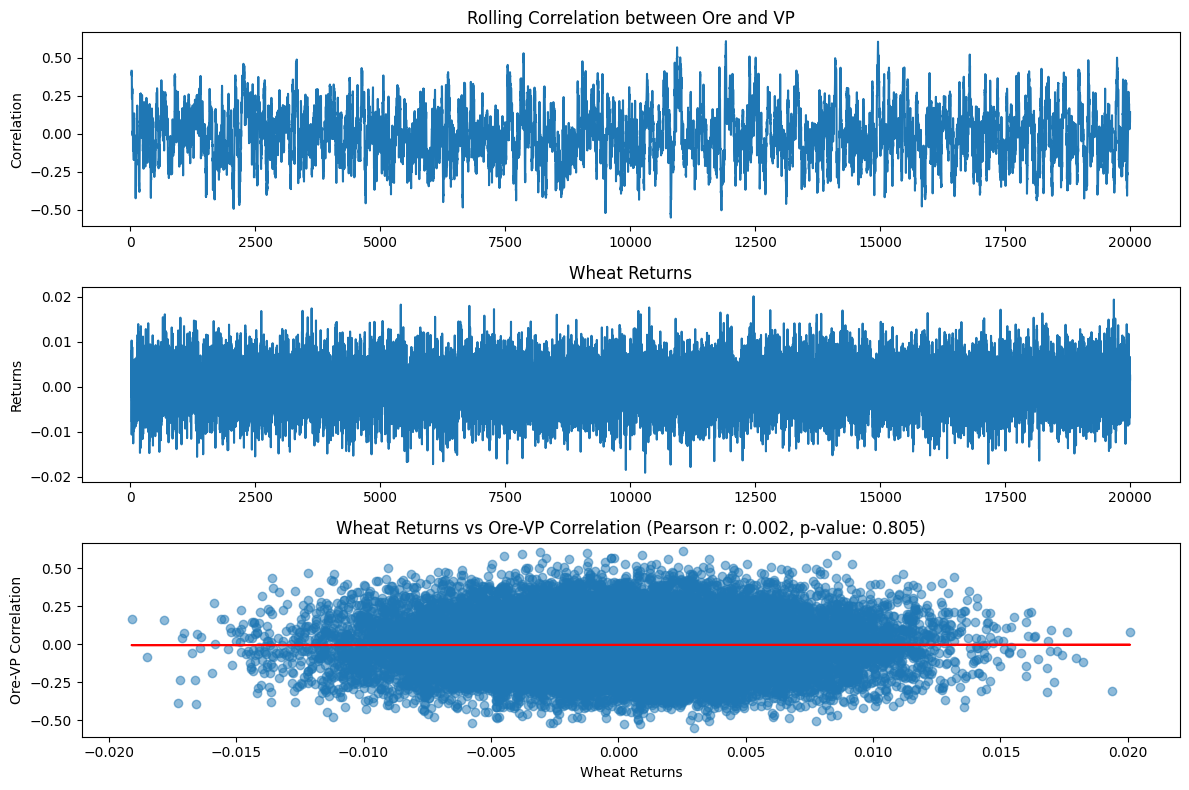

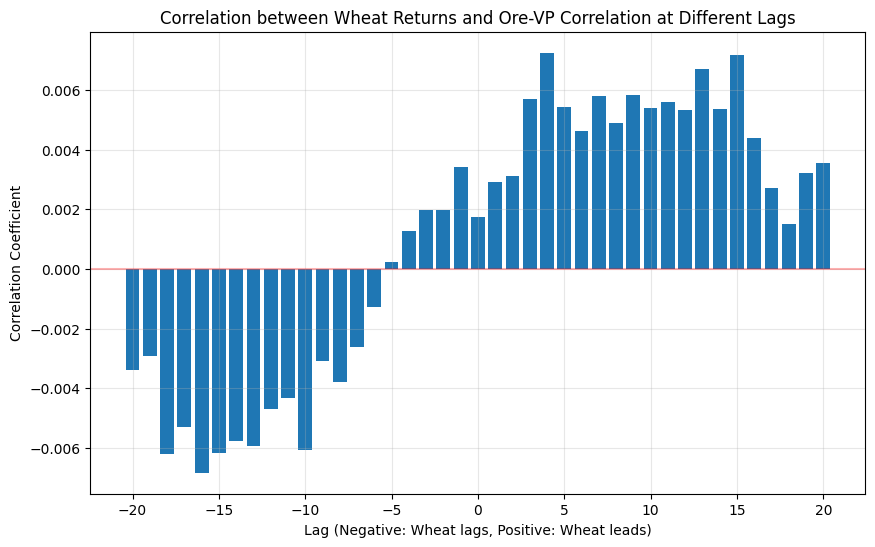

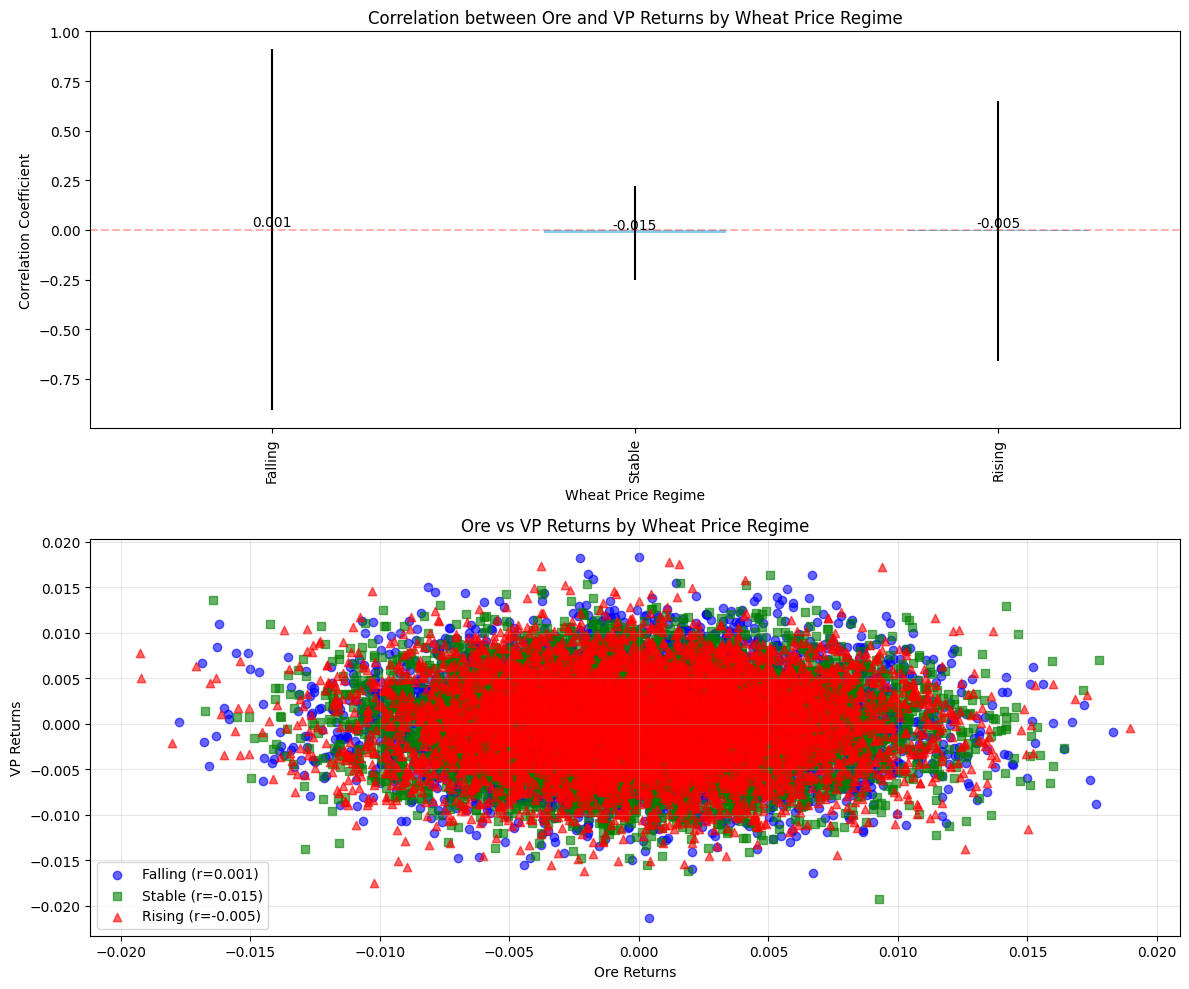

/Users/stefan/Library/Application Support/pypoetry/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



TypeError: BaseIRAnalysis.plot() got an unexpected keyword argument 'ax'

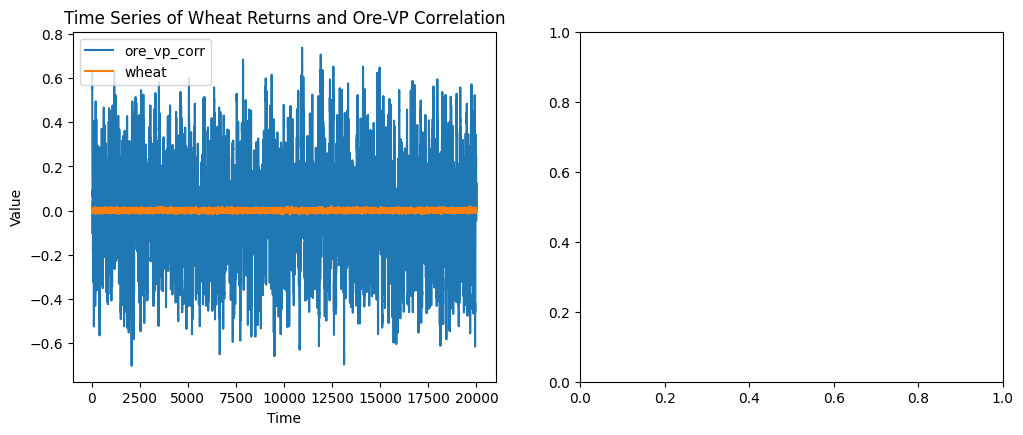

In [269]:
results_ts = time_series_correlation_analysis(ore, vp, wheat, window=30)
results_cond = conditional_correlation_analysis(ore, vp, wheat, n_quantiles=3)
results_var = var_analysis(ore, vp, wheat, max_lags=10)
